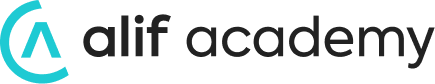

# Модуль 1.1: Python для аналитиков


### Функции

### Задания с занятия 

In [1]:
def f():
    s = '-- Inside f()'
    print(s)

print('Before calling f()')
f()
print('After calling f()')

Before calling f()
-- Inside f()
After calling f()


In [42]:
global_variable = 10 

def example_function():

    local_variable = 5
    
    global_access = global_variable + 2
    
    print('Inside the function:')
    print('Local variable:', local_variable)
    print('Global variable accessed locally:', global_access)
    
    
# call the function
example_function()

print(local_variable)

Inside the function:
Local variable: 5
Global variable accessed locally: 12


NameError: name 'local_variable' is not defined

In [43]:
def only_even(numbers):
    result = True
    for x in numbers:
        if x % 2 != 0:
            result = False
            break
    return result


print(only_even([2, 4, 6]))
print(only_even([1, 2, 3]))

True
False


In [45]:
def only_even(numbers):
    for i, x in enumerate(numbers):
        if x % 2 != 0:
            return False
    return True


print(only_even([2, 4, 6]))
print(only_even([1, 2, 3]))

True
False


Мы уже знаем, что аргумент функции — это локальная переменная. К нему также относится правило: изменение значения переменной (если это разрешено типом данных) действует на внешнюю переменную, а присваивание нового значения создаёт локальную переменную функции

In [9]:
def list_modify_1(list_arg):
    #A создаём новый локальный список, не имеющий связи с внешним
    list_arg = [1, 2, 3, 4]


def list_modify_2(list_arg):
    # меняем исходный внешний список, переданный как аргумент
    list_arg += [4]
#     list_arg = list_arg[:1]


sample_1 = [1, 2, 3]
sample_2 = [1, 2, 3]
list_modify_1(sample_1)
list_modify_2(sample_2)
print(sample_1)
print(sample_2)

[1, 2, 3]
[1, 2, 3, 4]


In [19]:
# Изменение глобальной переменной в функции при ПРИСВОЕНИИ
# но использование global считается плохой практикой 
def inc():
    global x
    x += 1
    print(f"Количество вызовов функции равно {x}.")


x = 0
inc()
inc()
inc()

Количество вызовов функции равно 1.
Количество вызовов функции равно 2.
Количество вызовов функции равно 3.


In [12]:
def f(count):
    count += 1
    print(f'Количество вызовов функции равно {count}.')
    return count

    
count_f = 0
count_f = f(count_f)
count_f = f(count_f)
count_f = f(count_f)

Количество вызовов функции равно 1.
Количество вызовов функции равно 2.
Количество вызовов функции равно 3.


In [20]:
# позиционные аргументы
# из-за последовательного перечисления при вызове функции
def f(qty, item, price):
    print(f'{qty} {item} cost ${price:.2f}')

In [22]:
f(6, 'bananas', 1.74)

6 bananas cost $1.74


In [23]:
# именованные аргументы
f(qty=6, item='bananas', price=1.74)

6 bananas cost $1.74


In [25]:
# должны быть существующими
f(qty=6, item='bananas', cost=1.74)

TypeError: f() got an unexpected keyword argument 'cost'

In [26]:
# порядок не имеет значения
f(item='bananas', price=1.74, qty=6)

6 bananas cost $1.74


In [21]:
# количество аргументов должно соответствовать 
f(qty=6, item='bananas')

TypeError: f() missing 1 required positional argument: 'price'

In [27]:
# можно комбинировать позиционные и именованные аргументы
f(6, price=1.74, item='bananas')
f(6, 'bananas', price=1.74)


6 bananas cost $1.74
6 bananas cost $1.74


In [29]:
# НО есть одно НО
#positional arguments must come first
f(item='bananas', 6, 1.74)

SyntaxError: positional argument follows keyword argument (2238686384.py, line 3)

In [31]:
# значения по умолчанию
def f(qty=6, item='bananas', price=1.74):
    print(f'{qty} {item} cost ${price:.2f}')

In [32]:
f(4, 'apples', 2.24)

f(4, 'apples')


f(4)

f()


f(item='kumquats', qty=9)

f(price=2.29)

4 apples cost $2.24
4 apples cost $1.74
4 bananas cost $1.74
6 bananas cost $1.74
9 kumquats cost $1.74
6 bananas cost $2.29


In summary:

- Positional arguments must agree in order and number with the parameters declared in the function definition.
- Keyword arguments must agree with declared parameters in number, but they may be specified in arbitrary order.
- Default parameters allow some arguments to be omitted when the function is called.

In [41]:
def add_value(x, list_arg=[]):
    list_arg += [x]
    print(id(list_arg))
    return list_arg


print(add_value(0))
print(add_value(0, [1, 2, 3]))
print(add_value(1))

print(list_arg)

140357664450432
[0]
140358465637504
[1, 2, 3, 0]
140357664450432
[0, 1]


NameError: name 'list_arg' is not defined

In [42]:
def add_value(x, list_arg=None):
    if list_arg is None:
        list_arg = []
    list_arg += [x]
    print(id(list_arg))
    return list_arg


print(add_value(0))
print(add_value(0, [1, 2, 3]))
print(add_value(1))

140357664442368
[0]
140357663387136
[1, 2, 3, 0]
140357664451136
[1]


Причина такого поведения:

In Python, default parameter values **are defined only once when the function is defined** (that is, when the def statement is executed). The default value isn’t re-defined each time the function is called. Thus, each time you call f() without a parameter, you’re performing .append() on the same list.

In [39]:
# Задание 

def f(my_list=[]): 
    my_list.append('###')
    return my_list

f()
f()
f()

['###', '###', '###']

In [7]:
# Tuple argument unpacking

def f(x, y, z):
    print(f'x = {x}')
    print(f'y = {y}')
    print(f'z = {z}')


# f(1, 2, 3)



t = ('foo', 'bar', 'baz')
print(t)

('foo', 'bar', 'baz')


In [8]:
def f(*args):
    print(type(args), args)


a = ['foo', 'bar', 'baz', 'qux']
f(*a)

<class 'tuple'> ('foo', 'bar', 'baz', 'qux')


In [37]:
def f(*args):
    for i in args:
            print(i)


a = [1, 2, 3]
t = (4, 5, 6)
s = {7, 8, 9}

f(*a, *t, *s)

1
2
3
4
5
6
8
9
7


In [40]:
# распакова аргументов словарей

def f(*kwargs):
    print(kwargs)
    print(type(kwargs))
    for item in kwargs: 
        print(item)

# l = [1, 2, 5]
f([1, 2, 5])

([1, 2, 5],)
<class 'tuple'>
[1, 2, 5]


In [16]:
def f(**kwargs):
    for k, v in kwargs.items():
            print(k, '->', v)


d1 = {'a': 1, 'b': 2}
d2 = {'x': 3, 'y': 4}

f(d1 = {'a': 1, 'b': 2})

d1 -> {'a': 1, 'b': 2}


In [18]:
def f(*args):
    for i in args:
            print(i)


f(*[1, 2, 3], *[4, 5, 6])


def f(**kwargs):
    for k, v in kwargs.items():
            print(k, '->', v)


f(a = {'a': 1, 'b': 2}, **{'x': 3, 'y': 4}, d = 'd', e = 'e')

1
2
3
4
5
6
a -> {'a': 1, 'b': 2}
x -> 3
y -> 4
d -> d
e -> e


In [20]:
def sum_all_numbers(*args):
    """
    Суммирует все числовые аргументы.
    """
    total = 0
    for num in args:
        if isinstance(num, (int, float)):
            total += num
    return total

def concatenate_strings(*args):
    """
    Конкатенирует все строковые аргументы.
    """
    result = ""
    for s in args:
        if isinstance(s, str):
            result += s
    return result

def display_info(*args):
    """
    Конкатенирует и отображает информацию из строковых аргументов.
    """
    result = ""
    for info in args:
        if isinstance(info, str):
            result += info + " "
    print(result)

# Примеры использования:

# Суммирование чисел
print(sum_all_numbers(1, 2, 3, 4, 5))  # Вывод: 15

# Конкатенация строк
print(concatenate_strings("Hello", ", ", "World", "!"))  # Вывод: Hello, World!

# Отображение информации
display_info("Name:", "John", "Age:", 25, "Country:", "USA")  # Вывод: Name: John Age: 25 Country: USA


15
Hello, World!
Name: John Age: Country: USA 


In [ ]:
# Assignment Title: Exploring the Power of *args and **kwargs in Python

# Function 1: sum_all_numbers
def sum_all_numbers(*args):
    return sum(args)

# Function 2: concatenate_strings
def concatenate_strings(*args):
    return ''.join(args)

# Function 3: display_info
def display_info(**kwargs):
    for key, value in kwargs.items():
        print(f"{key}: {value}")

# Additional Function 1: multiply_numbers
def multiply_numbers(*args):
    result = 1
    for num in args:
        result *= num
    return result

# Additional Function 2: format_and_display
def format_and_display(title, **kwargs):
    print(title)
    display_info(**kwargs)

# Additional Function 3: repeat_string
def repeat_string(s, times, **kwargs):
    repeated_string = s * times
    display_info(repeated_string=repeated_string, **kwargs)

# Test Cases
assert sum_all_numbers(1, 2, 3) == 6
assert concatenate_strings('Hello', ' ', 'World') == 'Hello World'

display_info(name='John', age=25, city='New York')

assert multiply_numbers(2, 3, 4) == 24

format_and_display("Person Information", name='Alice', age=30, country='USA')

repeat_string("Python", 3, description="A versatile programming language", category="General-purpose")

# You can add more test cases to further validate your functions



In [36]:
add = lambda x, y: x + y
print(add(5, 3))  # Output: 8

multiply = lambda x, y: x * y
print(multiply(4, 6))  # Output: 24

square = lambda x: x ** 2
print(square(7))  # Output: 49

is_even = lambda x: x % 2 == 0
print(is_even(10))  # Output: True

reverse_string = lambda s: s[::-1]
print(reverse_string("Hello"))  # Output: "olleH"

numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
even_numbers = list(filter(lambda x: x % 2 == 0, numbers))
print(even_numbers)  # Output: [2, 4, 6, 8, 10]

numbers = [1, 2, 3, 4, 5]
squared_numbers = list(map(lambda x, y: (x + y) ** 2, numbers, numbers))
print(squared_numbers)  # Output: [1, 4, 9, 16, 25]

list1 = [1, 2, 3]
list2 = [4, 5, 6]

combined = list(map(lambda x, y, z: x + y + z, list1, list2, list1))

8
24
49
True
olleH
[2, 4, 6, 8, 10]
[4, 16, 36, 64, 100]


In [21]:
# Lambda function with *args and **kwargs
lambda_function = lambda x, *args, **kwargs: (x, args, kwargs)

# Call the lambda function with arguments
result = lambda_function(1, 2, 3, a='apple', b='banana')

# Display the result
print(result)


(1, (2, 3), {'a': 'apple', 'b': 'banana'})


In [27]:
def square(x):
    return x ** 2

def square_list_elements(lst):
    # Using map() to apply the square function to each element of the list
    squared_values = list(map(square, lst+lst))
    return squared_values

# Example usage:
my_list = [1, 2, 3, 4, 5]
my_list1 = [1, 2, 3]
result = square_list_elements(my_list)

print(result)


[1, 4, 9, 16, 25, 1, 4, 9, 16, 25]


In [10]:
def square_generator(limit):
    for i in range(limit):
        yield i ** 2

# Using the generator
my_gen = square_generator(5)

# for value in my_gen:
#     print(value)


In [9]:
next(my_gen)

4

In [13]:
# def file_reader(file_path):
#     rows = []
#     for row in open(file_path, "r"):
#         rows.append(row)
#     return rows
  
# def print_row_count():
#     count = 0
#     for row in file_reader("large_file"):
#         count += 1
#     print(f"Total count is {count}")

# print_row_count()

In [2]:
def gen_file_reader(file_path):
    for row in open(file_path, "r"):
         yield row
        
def gen_print_row_count():
    count = 0
    for row in gen_file_reader("/Users/otabekmamatkulov/Desktop/all_problem_transactions.csv"):
        count += 1
    print(f"Total count is {count}")
    
gen_print_row_count()

Total count is 9976146


In [5]:
x = 10

def foo():
    y = 5
    print(x + y)

foo()
print(x)

15
10
